In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("Hackathon_Working_Data.csv")

In [3]:
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [5]:
df.shape

(26985, 14)

In [6]:
df.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [7]:
month_count = df["MONTH"].value_counts()
month_count

MONTH
M3    9430
M2    9192
M1    8363
Name: count, dtype: int64

In [8]:
group_count = df["GRP"].value_counts()
group_count

GRP
BISCUITS - CORE & NON CORE    6677
SALTY SNACKS (2/97)           1721
CHOCOLATE                     1408
SPICES (03/04)                1347
VERMICELLI & NOODLE           1330
                              ... 
MILK FOODS                       5
CONDOMS                          5
BABY OILS / MASSAGE OILS         5
AFTER SHAVE LOTIONS              3
ANTISEPTIC CREAMS                2
Name: count, Length: 80, dtype: int64

In [9]:
sgroup_count = df["SGRP"].value_counts()
sgroup_count

SGRP
SWEET/COOKIES              1954
CREAM                      1510
WASHING POWDERS/LIQUIDS    1208
INSTANT NOODLES            1060
MARIE                      1035
                           ... 
FRAGRANCE - COLOGNE           1
MARMALADES                    1
FEMININE HYGIENE              1
AUTOMATIC DIFFUSER            1
NON-BASMATI                   1
Name: count, Length: 174, dtype: int64

In [10]:
ssgroup_count = df["SSGRP"].value_counts()
ssgroup_count

SSGRP
SWEET/COOKIES                  1954
CREAM                          1510
WASHING POWDERS/LIQUIDS        1208
INSTANT NOODLES                1060
MARIE                          1035
                               ... 
MARMALADES                        1
MIXED MASALA-BASIC MASALA         1
CHUTNEY POWDER-SNACK MASALA       1
RAI POWDER-PURE SPICES            1
CURRY MASALA-BASIC MASALA         1
Name: count, Length: 232, dtype: int64

In [11]:
brand_count = df["BRD"].value_counts()
brand_count

BRD
MARIE GOLD REGULAR               786
AMUL                             775
EVEREST                          669
MAGGI MASALA                     641
PARLE-G                          603
                                ... 
NUTRI GOLD                         1
MEXITOS NACHO CHIPS                1
HARPIC FRESH PINE                  1
AXE SIGNATURE TICKET CHAMPION      1
JABSONS PEANUT                     1
Name: count, Length: 1315, dtype: int64

In [12]:
mbrand_count = df["MBRD"].value_counts()
mbrand_count

MBRD
MARIE GOLD          977
MAGGI               812
AMUL                779
EVEREST             712
GOOD DAY            687
                   ... 
SRI SRI AYURVEDA      1
RHYTHM                1
555                   1
MENTOS                1
JABSONS               1
Name: count, Length: 643, dtype: int64

In [13]:
cmp_count = df["CMP"].value_counts()
cmp_count

CMP
BRITANNIA INDS                   3147
HINDUSTAN UNILEVER LIMITED       3098
PARLE PRODS                      2328
MONDELEZ INTERNATIONAL           1637
NESTLE INDIA                     1307
                                 ... 
HARI OIL GENERAL MILL               1
SIMLA CHEMICAL                      1
KLF NIRMAL INDUSTRIES PVT LTD       1
TREE OF LIFE PVT LTD                1
JABSONS FOODS                       1
Name: count, Length: 354, dtype: int64

In [14]:
df.duplicated().sum()

90

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
month_count = df["MONTH"].value_counts()
month_count

MONTH
M3    9394
M2    9158
M1    8343
Name: count, dtype: int64

In [18]:
item_sold_in_each_month = df.groupby("MONTH")["QTY"].sum()
item_sold_in_each_month

MONTH
M1    22093.0
M2    36219.0
M3    52357.0
Name: QTY, dtype: float64

In [19]:
item_sold_in_each_store = df.groupby("STORECODE")["QTY"].sum()
item_sold_in_each_store 

STORECODE
N1     40499.0
N10     3568.0
N2     23782.0
N3      2869.0
N4      7906.0
N5      7131.0
N6      1929.0
N7     17867.0
N8      2507.0
N9      2611.0
Name: QTY, dtype: float64

In [20]:
price_in_each_month = df.groupby("MONTH")["PRICE"].sum()
price_in_each_month

MONTH
M1    419244.37
M2    518678.08
M3    483812.13
Name: PRICE, dtype: float64

In [21]:
price_in_in_each_store = df.groupby("STORECODE")["PRICE"].sum()
price_in_in_each_store 

STORECODE
N1     118701.40
N10    114531.00
N2     148243.10
N3     102259.79
N4     155690.23
N5     207097.00
N6      91061.00
N7     228406.53
N8      78641.52
N9     177103.01
Name: PRICE, dtype: float64

In [22]:
sales_in_each_month={
    'MONTH': ['M1','M2','M3'],
    'ITEMS': [22093.0,36219.0,52357.0]
}
df1 = pd.DataFrame(sales_in_each_month)

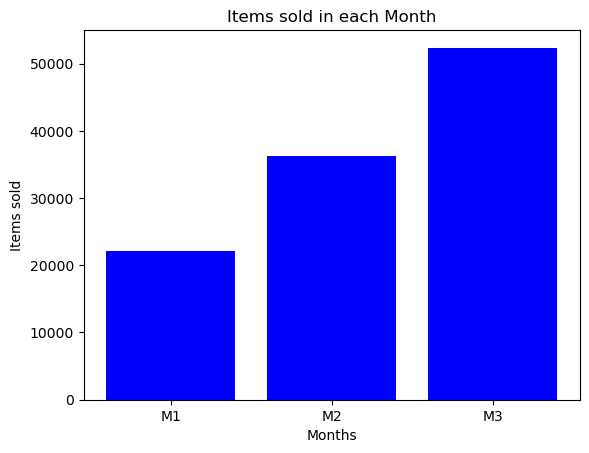

In [23]:
plt.bar(df1['MONTH'],df1['ITEMS'],color='blue')
plt.title("Items sold in each Month")
plt.xlabel("Months")
plt.ylabel("Items sold");

In [24]:
price_earned_in_each_month={
    'MONTH': ['M1','M2','M3'],
    'PRICE': [419244.37,518678.08,483812.13]

}
df2 = pd.DataFrame(price_earned_in_each_month)

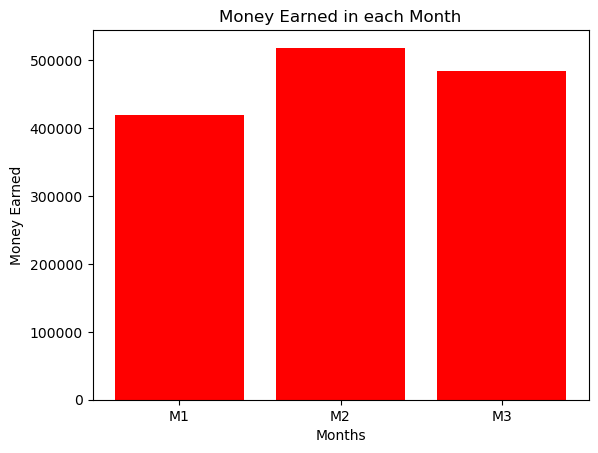

In [25]:
plt.bar(df2['MONTH'],df2['PRICE'],color='red')
plt.title("Money Earned in each Month")
plt.xlabel("Months")
plt.ylabel("Money Earned");

In [26]:
sales_in_each_store={
    'STORE': ['N1','N2','N3','N4','N5','N6','N7','N8','N9','N10'],
    'ITEMS': [40499.0,23782.0,2869.0,7906.0,7131.0,1929.0,17867.0,2507.0,2611.0,3568.0]
}
df3 = pd.DataFrame(sales_in_each_store)

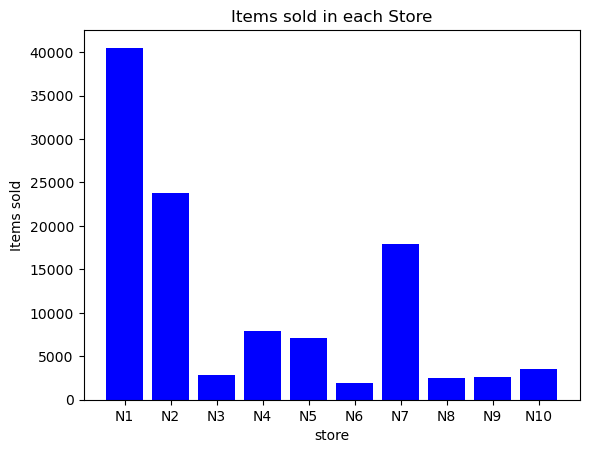

In [27]:
plt.bar(df3['STORE'],df3['ITEMS'],color='blue')
plt.title("Items sold in each Store")
plt.xlabel("store")
plt.ylabel("Items sold");

In [28]:
price_earned_in_each_store={
    'STORE': ['N1','N2','N3','N4','N5','N6','N7','N8','N9','N10'],
    'PRICE': [118701.40,148243.10,102259.79,155690.23,207097.00,91061.00,228406.53,78641.52,177103.01,114531.00]
}
df4 = pd.DataFrame(price_earned_in_each_store)

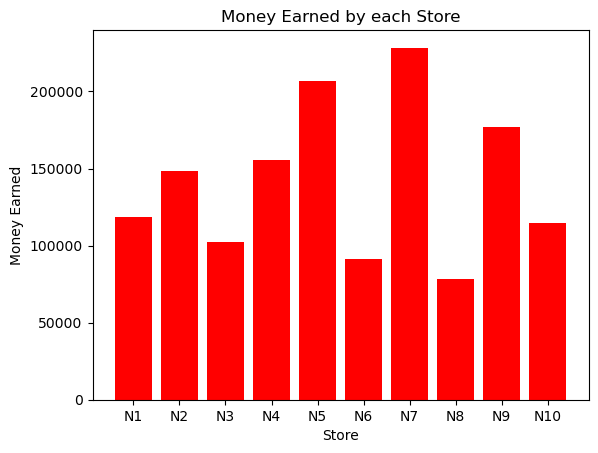

In [29]:
plt.bar(df4['STORE'],df4['PRICE'],color='red')
plt.title("Money Earned by each Store")
plt.xlabel("Store")
plt.ylabel("Money Earned");

In [30]:
df.groupby("DAY")["QTY"].sum()

DAY
1      1224.0
2      4256.0
3      3137.0
4      8199.0
5      1897.5
6      5327.0
7      2627.0
8      2123.0
9      1952.0
10     2518.0
11     1575.0
12     2639.0
13     5802.0
14     4381.0
15     6598.0
16     1221.0
17     2779.0
18     3210.0
19     1211.0
20     1370.0
21     1319.0
22      862.0
23     3133.0
24     1165.0
25     4475.0
26     4994.0
27    17411.0
28     7058.0
29     1879.5
30     2589.0
31     1737.0
Name: QTY, dtype: float64

In [31]:
days = list(range(1,32))
transaction_each_day = [1224.0,4256.0,3137.0,8199.0,1897.5,5327.0,2627.0,2123.0,1952.0,2518.0,1575.0,2639.0,5802.0,4381.0,6598.0,1221.0,2779.0,3210.0,1211.0,1370.0,1319.0,862.0,3133.0,1165.0,4475.0,4994.0,17411.0,7058.0,1879.5,2589.0,1737.0]

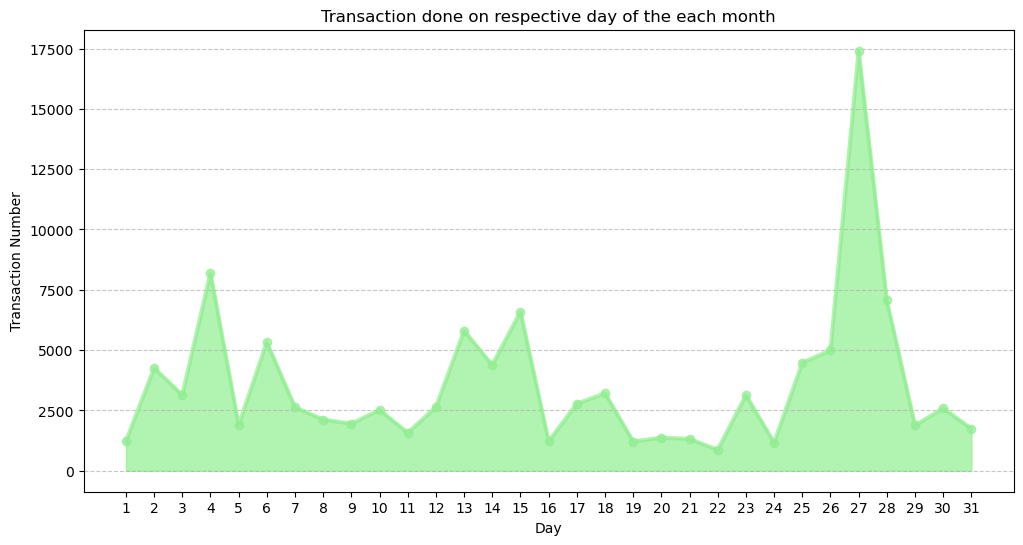

In [32]:
plt.figure(figsize=(12,6))
plt.fill_between(days,transaction_each_day,color='lightgreen',alpha=0.7)
plt.plot(days,transaction_each_day,color='lightgreen',alpha=0.7,marker='o',linewidth=3)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xticks(range(1,32))
plt.title("Transaction done on respective day of the each month")
plt.xlabel("Day")
plt.ylabel("Transaction Number");

In [33]:
m3 = df[df["MONTH"]=='M3']
price_each_day = m3.groupby('DAY')['PRICE'].sum()

In [34]:
price_each_day

DAY
1     14028.84
2     27265.59
3     28455.89
4     18853.47
5     20350.90
6     13410.27
7     16083.75
8     12566.96
9     17971.67
10    17247.58
11    11489.35
12    17780.68
13    16137.32
14    15238.93
15    15742.50
16     9465.67
17    15392.45
18    17290.26
19    16162.80
20    11727.30
21    12667.50
22     8896.00
23    13781.03
24    15239.30
25    18742.84
26    10525.43
27     8957.62
28    21967.30
29    13416.28
30    16699.31
31    10257.34
Name: PRICE, dtype: float64

In [35]:
days = list(range(1,32))
price_each_day_m1 = [14028.84,27265.59,28455.89,18853.47,20350.90,13410.27,16083.75,12566.96,17971.67,17247.58,11489.35,17780.68,16137.32,15238.93,15742.50,9465.67,15392.45,17290.26,16162.80,11727.30,12667.50,8896.00,13781.03,15239.30,18742.84,10525.43,8957.62,21967.30,13416.28,16699.31,10257.34]

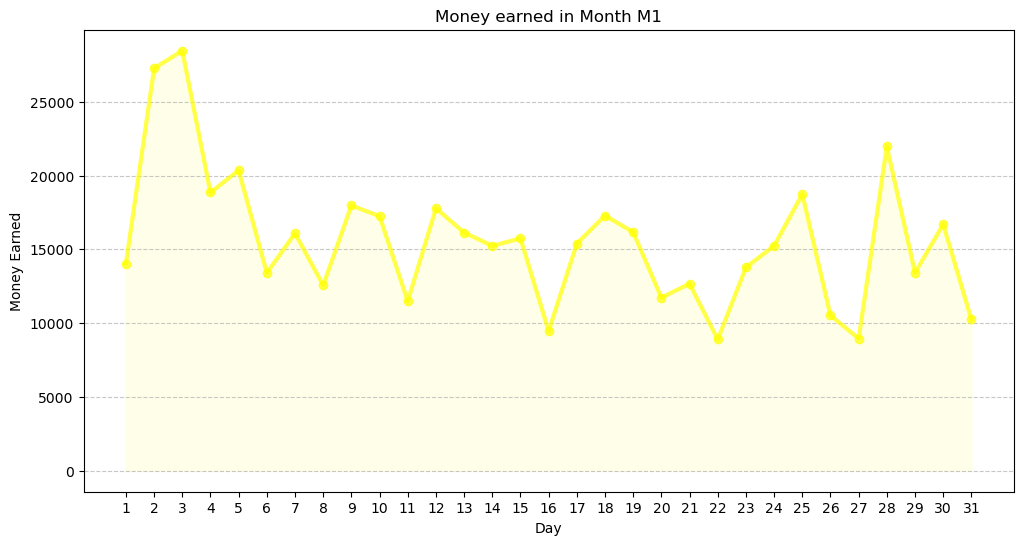

In [36]:
plt.figure(figsize=(12,6))
plt.fill_between(days,price_each_day_m1,color='lightyellow',alpha=0.7)
plt.plot(days,price_each_day_m1,color='yellow',alpha=0.7,marker='o',linewidth=3)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xticks(range(1,32))
plt.title("Money earned in Month M1")
plt.xlabel("Day")
plt.ylabel("Money Earned");

In [37]:
n7 = df[df["STORECODE"]=='N7']
price_each_day_n7 = n7.groupby('DAY')['PRICE'].sum()

In [38]:
price_each_day_n7

DAY
1      3331.55
2      7880.94
3      8090.41
4     15516.94
5     12757.30
6      3705.23
7      6205.35
8      9936.68
9     10082.48
10     1403.85
11     4952.95
12    10448.49
13     9562.91
15     9704.80
17     5945.50
18    11166.43
19     7067.69
20     7077.55
21     7390.55
22     4049.00
23    11179.30
24     3117.25
25     8178.68
26     6190.50
27     8861.75
28    12677.82
29     8705.51
30    10601.28
31     2617.84
Name: PRICE, dtype: float64

In [39]:
days = list(range(1,30))
price_each_day_in_n7 = [3331.55,7880.94,8090.41,15516.94,12757.30,3705.23,6205.35,9936.68,10082.48,1403.85,4952.95,10448.49,9562.91,9704.8,5945.50,11166.43,7067.69,7077.55,7390.55,4049.00,11179.30,3117.25,8178.68,6190.50,8861.75,12677.82,8705.51,10601.28,2617.84]

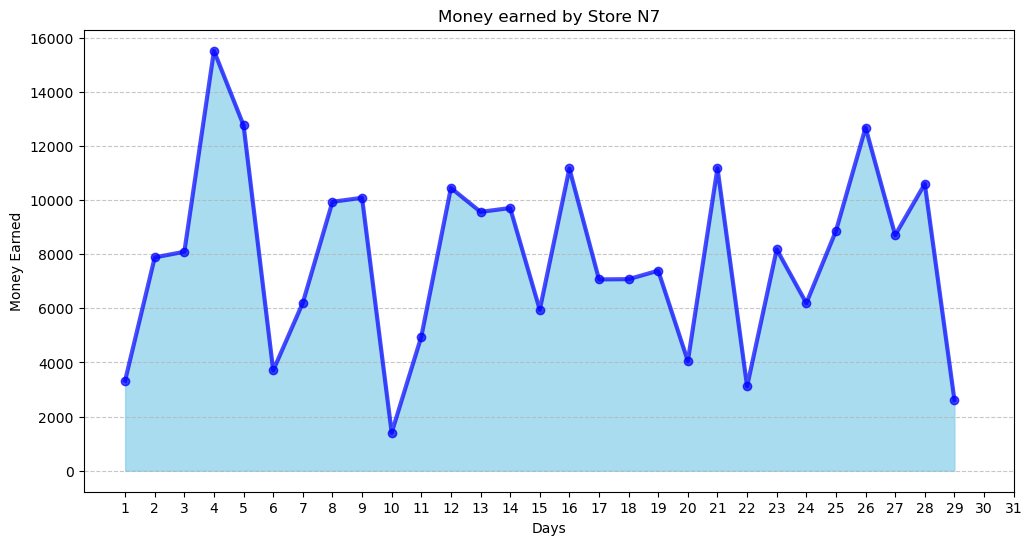

In [40]:
plt.figure(figsize=(12,6))
plt.fill_between(days,price_each_day_in_n7,color='skyblue',alpha=0.7)
plt.plot(days,price_each_day_in_n7,color='blue',alpha=0.7,marker='o',linewidth=3)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xticks(range(1,32))
plt.title("Money earned by Store N7")
plt.xlabel("Days")
plt.ylabel("Money Earned");

# THE FINAL FINDING ARE #

### THE MAXMIMUM OF THE FOLLOWING SECTIONS ###

| Column Name       | Highest  | Value |
| :---------------- | :------: | ----: |
| CMP  | BRITANNIA INDS    | 3147 |
| MBRD | MARIE GOLD    | 977 |
| BRD | MARIE GOLD REGULAR   | 786  |
| SSGRP |  SWEET/COOKIES   | 1954 |
| SGRP |  SWEET/COOKIES   | 1954 |
| GRP |  BISCUITS - CORE & NON CORE   | 6677 |

### THE MINIMUM OF THE FOLLOWING SECTIONS ###

| Column Name       | Highest  | Value |
| :---------------- | :------: | ----: |
| CMP  |JABSONS FOODS   | 1 |
| MBRD | JABSONS     | 1 |
| BRD | JABSONS PEANUTS   | 1 |
| SSGRP |  CURRY MASALA-BASIC MASALA    | 1 |
| SGRP |  NON-BASMATI   | 1 |
| GRP |  ANTISEPTIC CREAMS   | 2 |

-------------------------------------------------------------------------------

THE MONTH OF *M3* HAD THE MAXIMUM NO. OF ITEMS SOLD WHICH IS ABOUT *52357*


AND 


THE MONTH OF *M2* HAD THE MAXIUM MONEY EARNED WHICH IS ABOUT *518678.08*

-------------------------------------------------------------------------------

THE STORE *N7* HAD THE MAXIMUM MONEY EARNED WHICH IS ABOUT *228406.53*

AND 

THE STORE *N1* HAD THE MAXIMUM NO. OF ITEMS SOLD WHICH IS ABOUT *40499*

-------------------------------------------------------------------------------

REST OF THE ANALYSIS AND VISUALS CAN BE SEEN IN THE ABOVE CODE 